<a href="https://colab.research.google.com/github/Raphael340/Machine-Learning-L1-feature-selection/blob/main/Group_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

In [ ]:
!pip install seaborn

**PREPARING DATA **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from category_encoders import BackwardDifferenceEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History
from time import time
from sklearn import datasets
from sklearn.svm import l1_min_c



Grab the dataset

In [ ]:
data =pd.read_csv('/content/Housing Pricing.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Prepare dataset(Search for missing values)

In [ ]:
data.drop("Id",inplace=True,axis=1)

In [ ]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
len(data)

1460

In [ ]:
data.shape

(1460, 76)

In [ ]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
original_features=list(data.columns)
original_features
len(original_features)

76

In [ ]:
feature_missing=list(data.columns[data.isna().any()])
len(feature_missing)

15

In [ ]:
for feature in feature_missing:
  print(feature,'',(data[feature].isna().sum())/len(data)*100)

LotFrontage  17.73972602739726
MasVnrType  0.547945205479452
MasVnrArea  0.547945205479452
BsmtQual  2.5342465753424657
BsmtCond  2.5342465753424657
BsmtExposure  2.6027397260273974
BsmtFinType1  2.5342465753424657
BsmtFinType2  2.6027397260273974
Electrical  0.0684931506849315
FireplaceQu  47.26027397260274
GarageType  5.5479452054794525
GarageYrBlt  5.5479452054794525
GarageFinish  5.5479452054794525
GarageQual  5.5479452054794525
GarageCond  5.5479452054794525


In [ ]:
data.dropna(axis=1,thresh=0.5*(len(data)),inplace=True)

In [ ]:
mean_fill=['LotFrontage','MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(feature_missing)-set(mean_fill)-set(bfill))

In [ ]:
ffill

['GarageQual',
 'GarageFinish',
 'BsmtFinType2',
 'Electrical',
 'BsmtCond',
 'BsmtExposure',
 'MasVnrType',
 'BsmtFinType1',
 'GarageType',
 'GarageCond',
 'GarageYrBlt',
 'BsmtQual']

In [ ]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [ ]:
for feature in ffill:
  data[feature].fillna(method='ffill',inplace=True)

In [ ]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [ ]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

ENCODING DATASET

In [ ]:
cat_data=data.select_dtypes(include=['object']).copy()
cat_data.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
catergorical_features=list(data.select_dtypes(include=['object']).columns)
catergorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
numerical_list = list(set(original_features)-set(catergorical_features))
numerical_list

['MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'MoSold',
 'FullBath',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'LotFrontage',
 'SalePrice',
 'GrLivArea',
 'ScreenPorch',
 'BedroomAbvGr',
 'MSSubClass',
 '2ndFlrSF',
 'BsmtFinSF2',
 'GarageCars',
 'YrSold',
 'GarageArea',
 'OverallCond',
 'YearBuilt',
 'Fireplaces',
 'WoodDeckSF',
 'EnclosedPorch',
 'OverallQual',
 'LowQualFinSF',
 'BsmtFullBath',
 'KitchenAbvGr',
 'PoolArea',
 'LotArea',
 'HalfBath',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtHalfBath',
 'MiscVal',
 '3SsnPorch',
 'GarageYrBlt',
 'OpenPorchSF']

In [ ]:
catergorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
norminal=['MSZoning','LandContour','Neighborhood','LotConfig']
ordinal=list(set(catergorical_features)-set(norminal))


In [ ]:
target=['SalePrice']

In [ ]:
data[norminal]

,MSZoning,LandContour,Neighborhood,LotConfig
0,RL,Lvl,CollgCr,Inside
1,RL,Lvl,Veenker,FR2
2,RL,Lvl,CollgCr,Inside
3,RL,Lvl,Crawfor,Corner
4,RL,Lvl,NoRidge,FR2
...,...,...,...,...
1455,RL,Lvl,Gilbert,Inside
1456,RL,Lvl,NWAmes,Inside
1457,RL,Lvl,Crawfor,Inside
1458,RL,Lvl,NAmes,Inside


In [ ]:
data[numerical_list]

,MasVnrArea,BsmtUnfSF,TotalBsmtSF,MoSold,FullBath,1stFlrSF,TotRmsAbvGrd,LotFrontage,SalePrice,GrLivArea,ScreenPorch,BedroomAbvGr,MSSubClass,2ndFlrSF,BsmtFinSF2,GarageCars,YrSold,GarageArea,OverallCond,YearBuilt,Fireplaces,WoodDeckSF,EnclosedPorch,OverallQual,LowQualFinSF,BsmtFullBath,KitchenAbvGr,PoolArea,LotArea,HalfBath,YearRemodAdd,BsmtFinSF1,BsmtHalfBath,MiscVal,3SsnPorch,GarageYrBlt,OpenPorchSF
0,196.0,150,856,2,2,856,8,65.0,208500,1710,0,3,60,854,0,2,2008,548,5,2003,0,0,0,7,0,1,1,0,8450,1,2003,706,0,0,0,2003.0,61
1,0.0,284,1262,5,2,1262,6,80.0,181500,1262,0,3,20,0,0,2,2007,460,8,1976,1,298,0,6,0,0,1,0,9600,0,1976,978,1,0,0,1976.0,0
2,162.0,434,920,9,2,920,6,68.0,223500,1786,0,3,60,866,0,2,2008,608,5,2001,1,0,0,7,0,1,1,0,11250,1,2002,486,0,0,0,2001.0,42
3,0.0,540,756,2,1,961,7,60.0,140000,1717,0,3,70,756,0,3,2006,642,5,1915,1,0,272,7,0,1,1,0,9550,0,1970,216,0,0,0,1998.0,35
4,350.0,490,1145,12,2,1145,9,84.0,250000,2198,0,4,60,1053,0,3,2008,836,5,2000,1,192,0,8,0,1,1,0,14260,1,2000,655,0,0,0,2000.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,953,953,8,2,953,7,62.0,175000,1647,0,3,60,694,0,2,2007,460,5,1999,1,0,0,6,0,0,1,0,7917,1,2000,0,0,0,0,1999.0,40
1456,119.0,589,1542,2,2,2073,7,85.0,210000,2073,0,3,20,0,163,2,2010,500,6,1978,2,349,0,6,0,1,1,0,13175,0,1988,790,0,0,0,1978.0,0
1457,0.0,877,1152,5,2,1188,9,66.0,266500,2340,0,4,70,1152,0,1,2010,252,9,1941,2,0,0,7,0,0,1,0,9042,0,2006,275,0,2500,0,1941.0,60
1458,0.0,0,1078,4,1,1078,5,68.0,142125,1078,0,2,20,0,1029,1,2010,240,6,1950,0,366,112,5,0,1,1,0,9717,0,1996,49,0,0,0,1950.0,0


In [ ]:
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
for feature in ordinal:
  data[feature]=(data[feature].astype('category')).cat.codes

In [ ]:
data[ordinal]

,Exterior1st,GarageFinish,BldgType,Heating,ExterQual,MasVnrType,GarageCond,RoofMatl,Condition2,ExterCond,CentralAir,LandSlope,HeatingQC,HouseStyle,Utilities,PavedDrive,Street,BsmtQual,FireplaceQu,Functional,BsmtFinType2,SaleCondition,BsmtExposure,BsmtFinType1,KitchenQual,Exterior2nd,Condition1,GarageQual,LotShape,SaleType,Electrical,BsmtCond,GarageType,Foundation,RoofStyle
0,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,3,2,2,13,2,4,3,8,4,3,1,2,1
1,8,1,0,1,3,2,4,1,2,4,1,0,0,2,0,2,1,2,4,6,5,4,1,0,3,8,1,4,3,8,4,3,1,1,1
2,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,2,2,2,13,2,4,0,8,4,3,1,2,1
3,13,2,0,1,3,2,4,1,2,4,1,0,2,5,0,2,1,3,2,6,5,0,3,0,2,15,2,4,0,8,4,1,5,0,1
4,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,0,2,2,13,2,4,0,8,4,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12,1,0,1,3,2,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,3,5,3,13,2,4,3,8,4,3,1,2,1
1456,9,2,0,1,3,3,4,1,2,4,1,0,4,2,0,2,1,2,4,2,4,4,3,0,3,10,2,4,3,8,4,3,1,1,1
1457,5,1,0,1,0,2,4,1,2,2,1,0,0,5,0,2,1,3,2,6,5,4,3,2,2,5,2,4,3,8,4,1,1,4,1
1458,8,2,0,1,3,2,4,1,2,4,1,0,2,2,0,2,1,3,-1,6,4,4,2,2,2,8,2,4,3,8,0,3,1,1,3


In [ ]:
df_nominal=pd.get_dummies(data[norminal])

In [ ]:
df_original=data[ordinal]

In [ ]:
df_numerical=data[numerical_list]

In [ ]:
encoded_data=pd.concat([df_numerical,df_nominal,df_original],axis=1)

In [ ]:
encoded_data.head(4)

,MasVnrArea,BsmtUnfSF,TotalBsmtSF,MoSold,FullBath,1stFlrSF,TotRmsAbvGrd,LotFrontage,SalePrice,GrLivArea,ScreenPorch,BedroomAbvGr,MSSubClass,2ndFlrSF,BsmtFinSF2,GarageCars,YrSold,GarageArea,OverallCond,YearBuilt,Fireplaces,WoodDeckSF,EnclosedPorch,OverallQual,LowQualFinSF,BsmtFullBath,KitchenAbvGr,PoolArea,LotArea,HalfBath,YearRemodAdd,BsmtFinSF1,BsmtHalfBath,MiscVal,3SsnPorch,GarageYrBlt,OpenPorchSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Exterior1st,GarageFinish,BldgType,Heating,ExterQual,MasVnrType,GarageCond,RoofMatl,Condition2,ExterCond,CentralAir,LandSlope,HeatingQC,HouseStyle,Utilities,PavedDrive,Street,BsmtQual,FireplaceQu,Functional,BsmtFinType2,SaleCondition,BsmtExposure,BsmtFinType1,KitchenQual,Exterior2nd,Condition1,GarageQual,LotShape,SaleType,Electrical,BsmtCond,GarageType,Foundation,RoofStyle
0,196.0,150,856,2,2,856,8,65.0,208500,1710,0,3,60,854,0,2,2008,548,5,2003,0,0,0,7,0,1,1,0,8450,1,2003,706,0,0,0,2003.0,61,0,0,0,...,0,0,0,0,1,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,3,2,2,13,2,4,3,8,4,3,1,2,1
1,0.0,284,1262,5,2,1262,6,80.0,181500,1262,0,3,20,0,0,2,2007,460,8,1976,1,298,0,6,0,0,1,0,9600,0,1976,978,1,0,0,1976.0,0,0,0,0,...,0,0,1,0,0,8,1,0,1,3,2,4,1,2,4,1,0,0,2,0,2,1,2,4,6,5,4,1,0,3,8,1,4,3,8,4,3,1,1,1
2,162.0,434,920,9,2,920,6,68.0,223500,1786,0,3,60,866,0,2,2008,608,5,2001,1,0,0,7,0,1,1,0,11250,1,2002,486,0,0,0,2001.0,42,0,0,0,...,0,0,0,0,1,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,2,2,2,13,2,4,0,8,4,3,1,2,1
3,0.0,540,756,2,1,961,7,60.0,140000,1717,0,3,70,756,0,3,2006,642,5,1915,1,0,272,7,0,1,1,0,9550,0,1970,216,0,0,0,1998.0,35,0,0,0,...,1,0,0,0,0,13,2,0,1,3,2,4,1,2,4,1,0,2,5,0,2,1,3,2,6,5,0,3,0,2,15,2,4,0,8,4,1,5,0,1


In [ ]:
encoded_data.shape

(1460, 111)

DATA NORMALIZATION

In [ ]:
encoded_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
X=encoded_data.drop('SalePrice',axis=1)

In [ ]:
X

,MasVnrArea,BsmtUnfSF,TotalBsmtSF,MoSold,FullBath,1stFlrSF,TotRmsAbvGrd,LotFrontage,GrLivArea,ScreenPorch,BedroomAbvGr,MSSubClass,2ndFlrSF,BsmtFinSF2,GarageCars,YrSold,GarageArea,OverallCond,YearBuilt,Fireplaces,WoodDeckSF,EnclosedPorch,OverallQual,LowQualFinSF,BsmtFullBath,KitchenAbvGr,PoolArea,LotArea,HalfBath,YearRemodAdd,BsmtFinSF1,BsmtHalfBath,MiscVal,3SsnPorch,GarageYrBlt,OpenPorchSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Exterior1st,GarageFinish,BldgType,Heating,ExterQual,MasVnrType,GarageCond,RoofMatl,Condition2,ExterCond,CentralAir,LandSlope,HeatingQC,HouseStyle,Utilities,PavedDrive,Street,BsmtQual,FireplaceQu,Functional,BsmtFinType2,SaleCondition,BsmtExposure,BsmtFinType1,KitchenQual,Exterior2nd,Condition1,GarageQual,LotShape,SaleType,Electrical,BsmtCond,GarageType,Foundation,RoofStyle
0,196.0,150,856,2,2,856,8,65.0,1710,0,3,60,854,0,2,2008,548,5,2003,0,0,0,7,0,1,1,0,8450,1,2003,706,0,0,0,2003.0,61,0,0,0,1,...,0,0,0,0,1,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,3,2,2,13,2,4,3,8,4,3,1,2,1
1,0.0,284,1262,5,2,1262,6,80.0,1262,0,3,20,0,0,2,2007,460,8,1976,1,298,0,6,0,0,1,0,9600,0,1976,978,1,0,0,1976.0,0,0,0,0,1,...,0,0,1,0,0,8,1,0,1,3,2,4,1,2,4,1,0,0,2,0,2,1,2,4,6,5,4,1,0,3,8,1,4,3,8,4,3,1,1,1
2,162.0,434,920,9,2,920,6,68.0,1786,0,3,60,866,0,2,2008,608,5,2001,1,0,0,7,0,1,1,0,11250,1,2002,486,0,0,0,2001.0,42,0,0,0,1,...,0,0,0,0,1,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,2,2,2,13,2,4,0,8,4,3,1,2,1
3,0.0,540,756,2,1,961,7,60.0,1717,0,3,70,756,0,3,2006,642,5,1915,1,0,272,7,0,1,1,0,9550,0,1970,216,0,0,0,1998.0,35,0,0,0,1,...,1,0,0,0,0,13,2,0,1,3,2,4,1,2,4,1,0,2,5,0,2,1,3,2,6,5,0,3,0,2,15,2,4,0,8,4,1,5,0,1
4,350.0,490,1145,12,2,1145,9,84.0,2198,0,4,60,1053,0,3,2008,836,5,2000,1,192,0,8,0,1,1,0,14260,1,2000,655,0,0,0,2000.0,84,0,0,0,1,...,0,0,1,0,0,12,1,0,1,2,1,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,0,2,2,13,2,4,0,8,4,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,953,953,8,2,953,7,62.0,1647,0,3,60,694,0,2,2007,460,5,1999,1,0,0,6,0,0,1,0,7917,1,2000,0,0,0,0,1999.0,40,0,0,0,1,...,0,0,0,0,1,12,1,0,1,3,2,4,1,2,4,1,0,0,5,0,2,1,2,4,6,5,4,3,5,3,13,2,4,3,8,4,3,1,2,1
1456,119.0,589,1542,2,2,2073,7,85.0,2073,0,3,20,0,163,2,2010,500,6,1978,2,349,0,6,0,1,1,0,13175,0,1988,790,0,0,0,1978.0,0,0,0,0,1,...,0,0,0,0,1,9,2,0,1,3,3,4,1,2,4,1,0,4,2,0,2,1,2,4,2,4,4,3,0,3,10,2,4,3,8,4,3,1,1,1
1457,0.0,877,1152,5,2,1188,9,66.0,2340,0,4,70,1152,0,1,2010,252,9,1941,2,0,0,7,0,0,1,0,9042,0,2006,275,0,2500,0,1941.0,60,0,0,0,1,...,0,0,0,0,1,5,1,0,1,0,2,4,1,2,2,1,0,0,5,0,2,1,3,2,6,5,4,3,2,2,5,2,4,3,8,4,1,1,4,1
1458,0.0,0,1078,4,1,1078,5,68.0,1078,0,2,20,0,1029,1,2010,240,6,1950,0,366,112,5,0,1,1,0,9717,0,1996,49,0,0,0,1950.0,0,0,0,0,1,...,0,0,0,0,1,8,2,0,1,3,2,4,1,2,4,1,0,2,2,0,2,1,3,-1,6,4,4,2,2,2,8,2,4,3,8,0,3,1,1,3


In [ ]:
Y=data[target]

In [ ]:
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
X=X.to_numpy()

In [ ]:
X

array([[1.960e+02, 1.500e+02, 8.560e+02, ..., 1.000e+00, 2.000e+00,
        1.000e+00],
       [0.000e+00, 2.840e+02, 1.262e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.620e+02, 4.340e+02, 9.200e+02, ..., 1.000e+00, 2.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 8.770e+02, 1.152e+03, ..., 1.000e+00, 4.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.078e+03, ..., 1.000e+00, 1.000e+00,
        3.000e+00],
       [0.000e+00, 1.360e+02, 1.256e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [ ]:
Y=Y.to_numpy()

In [ ]:
Y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [ ]:
X.shape

(1460, 110)

In [ ]:
Y.shape

(1460, 1)

Standardizing using sklearn

In [ ]:
StandardScaler().fit_transform(X)

array([[ 0.51141841, -0.94459061, -0.45930254, ..., -0.72327571,
         0.83559903, -0.49151573],
       [-0.57441047, -0.64122799,  0.46646492, ..., -0.72327571,
        -0.54916213, -0.49151573],
       [ 0.32306034, -0.30164298, -0.31336875, ..., -0.72327571,
         0.83559903, -0.49151573],
       ...,
       [-0.57441047,  0.70126476,  0.21564122, ..., -0.72327571,
         3.60512136, -0.49151573],
       [-0.57441047, -1.28417562,  0.04690528, ..., -0.72327571,
        -0.54916213,  1.90452089],
       [-0.57441047, -0.97628521,  0.45278362, ..., -0.72327571,
        -0.54916213, -0.49151573]])

In [ ]:
X=StandardScaler().fit_transform(X)
Y=StandardScaler().fit_transform(Y)

In [ ]:
Y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [ ]:
X.shape

(1460, 110)

Feature Selection using L1

In [ ]:
data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [ ]:
data.shape

(1460, 76)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import linear_model

In [ ]:
regressor = LassoCV()
regressor.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
new_x = PowerTransformer().fit_transform(encoded_data)

test_data = pd.DataFrame(new_x,columns=encoded_data.columns)
test_data = pd.concat([test_data[ordinal],test_data[numerical_list],test_data[target]],axis=1)
test_data

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


,Exterior1st,GarageFinish,BldgType,Heating,ExterQual,MasVnrType,GarageCond,RoofMatl,Condition2,ExterCond,CentralAir,LandSlope,HeatingQC,HouseStyle,Utilities,PavedDrive,Street,BsmtQual,FireplaceQu,Functional,BsmtFinType2,SaleCondition,BsmtExposure,BsmtFinType1,KitchenQual,Exterior2nd,Condition1,GarageQual,LotShape,SaleType,Electrical,BsmtCond,GarageType,Foundation,RoofStyle,MasVnrArea,BsmtUnfSF,TotalBsmtSF,MoSold,FullBath,1stFlrSF,TotRmsAbvGrd,LotFrontage,SalePrice,GrLivArea,ScreenPorch,BedroomAbvGr,MSSubClass,2ndFlrSF,BsmtFinSF2,GarageCars,YrSold,GarageArea,OverallCond,YearBuilt,Fireplaces,WoodDeckSF,EnclosedPorch,OverallQual,LowQualFinSF,BsmtFullBath,KitchenAbvGr,PoolArea,LotArea,HalfBath,YearRemodAdd,BsmtFinSF1,BsmtHalfBath,MiscVal,3SsnPorch,GarageYrBlt,OpenPorchSF,SalePrice
0,0.750372,-0.274041,-0.44347,-0.098742,-1.148859,-1.233679,0.199715,-0.083091,-0.001447,0.372617,0.263813,-0.237571,-0.956770,1.018787,-0.02618,0.299252,0.064238,-0.565973,1.129843,0.271156,0.361273,0.032281,0.676447,-0.318795,-0.708836,0.759104,0.053417,0.232705,0.752862,0.388981,0.305960,0.293783,-0.711719,0.836707,-0.399795,1.218044,-0.887576,-0.404029,-1.694229,0.797246,-0.799624,0.946380,-0.156500,0.571155,0.528531,-0.293785,0.170752,0.493460,1.170239,-0.359384,0.273835,0.140053,0.383899,-0.477387,1.151867,-1.027341,-0.950337,-0.407595,0.667499,-0.134652,1.175573,-0.172658,-0.069409,-0.141171,1.284128,0.908055,0.797537,-0.243940,-0.192177,-0.129279,1.069734,0.841820,0.571155
1,-0.647061,-0.274041,-0.44347,-0.098742,0.768841,0.383318,0.199715,-0.083091,-0.001447,0.372617,0.263813,-0.237571,-0.956770,-0.453441,-0.02618,0.299252,0.064238,-0.565973,1.129843,0.271156,0.361273,0.032281,-1.413698,-1.605112,0.931869,-0.784551,-1.391852,0.232705,0.752862,0.388981,0.305960,0.293783,-0.711719,-0.542010,-0.399795,-0.827466,-0.434388,0.508177,-0.444891,0.797246,0.429151,-0.234627,0.536617,0.227627,-0.382755,-0.293785,0.170752,-1.164269,-0.871454,-0.359384,0.273835,-0.613715,-0.004602,2.011352,0.006695,0.784005,1.213714,-0.407595,-0.042192,-0.134652,-0.838866,-0.172658,-0.069409,0.105609,-0.773692,-0.621670,1.011471,4.099375,-0.192177,-0.129279,-0.284206,-1.071307,0.227627
2,0.750372,-0.274041,-0.44347,-0.098742,-1.148859,-1.233679,0.199715,-0.083091,-0.001447,0.372617,0.263813,-0.237571,-0.956770,1.018787,-0.02618,0.299252,0.064238,-0.565973,1.129843,0.271156,0.361273,0.032281,-0.646216,-0.318795,-0.708836,0.759104,0.053417,0.232705,-1.371959,0.388981,0.305960,0.293783,-0.711719,0.836707,-0.399795,1.179948,-0.048083,-0.253787,0.987490,0.797246,-0.568533,-0.234627,-0.011160,0.741869,0.659112,-0.293785,0.170752,0.493460,1.172896,-0.359384,0.273835,0.140053,0.641990,-0.477387,1.055357,0.784005,-0.950337,-0.407595,0.667499,-0.134652,1.175573,-0.172658,-0.069409,0.413721,1.284128,0.835594,0.571325,-0.243940,-0.192177,-0.129279,0.950730,0.668453,0.741869
3,1.157540,1.023401,-0.44347,-0.098742,0.768841,0.383318,0.199715,-0.083091,-0.001447,0.372617,0.263813,-0.237571,0.692110,1.018787,-0.02618,0.299252,0.064238,1.002981,-0.650597,0.271156,0.361273,-2.599251,0.676447,-1.605112,-0.708836,1.500145,0.053417,0.232705,-1.371959,0.388981,0.305960,-3.405201,1.383038,-1.959038,-0.399795,-0.827466,0.183337,-0.644806,-1.694229,-1.025173,-0.429428,0.389921,-0.407405,-0.425386,0.540797,-0.293785,0.170752,0.698191,1.146834,-0.359384,1.759713,-1.368874,0.786092,-0.477387,-1.629540,0.784005,-0.950337,2.456640,0.667499,-0.134652,1.175573,-0.172658,-0.069409,0.095490,-0.773692,-0.863478,0.142272,-0.243940,-0.192177,-0.129279,0.778409,0.584540,-0.425386
4,0.750372,-0.274041,-0.44347,-0.098742,-1.148859,-1.233679,0.199715,-0.083091,-0.001447,0.372617,0.263813,-0.237571,-0.956770,1.018787,-0.02618,0.299252,0.064238,-0.565973,1.129843,0.271156,0.361273,0.032281,-1.751933,-0.318795,-0.708836,0.759104,0.053417,0.232705,-1.371959,0.388981,0.305960,0.293783,-0.711719,0.836707,-0.399795,1.324337,0.077485,0.254387,1.963461,0.797246,0.124698,1.448615,0.708754,1.015293,1.282894,-0.293785,1.382874,

In [ ]:
data = pd.concat([pd.get_dummies(data[norminal]),data],axis=1)
data.drop(norminal,axis=1,inplace=True)
data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSSubClass,...,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60,...,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,4,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,20,...,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60,...,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,70,...,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60,...,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60,...,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,4,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,0,8,2007,8,4,175000
1456,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,...,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,4,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,0,2,2010,8,4,210000
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,70,...,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,2500,5,2010,8,4,266500
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,...,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,-1,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,0,4,2010,8,4,142125


In [ ]:
epochs = 200
model_2 = Sequential()
model_2.add(Dense(4, input_shape = (2,), activation= 'tanh'))
model_2.add(Dense(2, activation = 'tanh'))
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(Adam(learning_rate = 0.01),'binary_crossentropy', metrics = ['Precision', 'Recall'])


#history = model_2.fit(X, Y, verbose = 0, epochs = epochs)

L1 regression

In [ ]:
iris = datasets.load_iris()
X = iris.data
y =iris.target


X =X[y !=2]
y =y[y !=2]


X /=X.max()

In [ ]:
cs = l1_min_c(X,y, loss='log') * np.logspace(0,7, 16)


Computing regularization path...
This took 0.091s


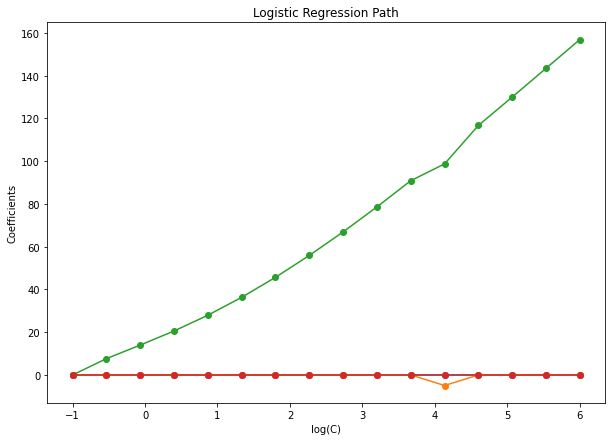

In [ ]:
print("Computing regularization path...")
start = time()
clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()